In [604]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [627]:
file_path = '~/Google Drive/Projects/Employment_EU/'

employment = pd.read_csv(os.path.join(file_path, 'ICT_Employment.csv'), dtype={'TIME':'object','Value' : 'float64'})

In [628]:
employment.head()

,TIME,GEO,UNIT,Value,Flag and Footnotes
0,2009,European Union - 28 countries,Thousand,6313.6,NaN
1,2009,European Union - 28 countries,Percentage of total employment,2.9,NaN
2,2009,European Union - 15 countries (1995-2004),Thousand,5066.4,NaN
3,2009,European Union - 15 countries (1995-2004),Percentage of total employment,2.9,NaN
4,2009,Euro area (19 countries),Thousand,3470.2,NaN


In [630]:
employment = employment.loc[employment['UNIT'] == 
                            'Thousand',
                            ['TIME', 'GEO','Value']]

In [631]:
employment = employment.loc[(employment['GEO']!='European Union - 28 countries') & 
               (employment['GEO']!='European Union - 15 countries (1995-2004)') & 
               (employment['GEO']!='Euro area (19 countries)') ,:]

In [632]:
employment.loc[employment['GEO'] =='Germany (until 1990 former territory of the FRG)','GEO'] = 'Germany'

In [633]:
employment = employment.pivot(index='GEO',columns='TIME',values='Value')

In [634]:
employment = employment.dropna()

In [636]:
employment['2018'].sum()

9513.2

In [637]:
percentages = (employment/employment.sum(axis=0)) * 100

In [638]:
percentages

TIME,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
GEO,,,,,,,,,,
Austria,1.972724,2.001911,2.109582,1.959974,1.946602,1.851967,2.001153,2.025173,2.086690,2.016146
Belgium,1.695798,2.006389,2.316175,2.598632,2.414756,2.386593,2.263009,2.197528,2.381138,2.402977
Bulgaria,0.577673,0.598633,0.785637,0.663991,0.848290,0.685960,0.836016,0.917338,0.788898,1.008073
Croatia,0.570229,0.529961,0.564495,0.518660,0.493667,0.520982,0.512901,0.593038,0.594451,0.606526
Cyprus,0.077420,0.080614,0.117846,0.107999,0.108428,0.106677,0.094893,0.089579,0.095557,0.112475
Czechia,3.003007,3.037948,2.307446,2.247970,2.342046,2.085168,2.217364,2.051253,2.054467,2.288399
Denmark,1.366763,1.401785,1.447610,1.454647,1.417218,1.299974,1.278047,1.353895,1.361126,1.299247
Estonia,0.318614,0.332905,0.302616,0.310663,0.327835,0.303906,0.342334,0.386665,0.410005,0.398394
Finland,1.908704,2.019825,2.006285,1.942641,2.026967,1.938797,1.894249,1.840345,1.868910,1.909978


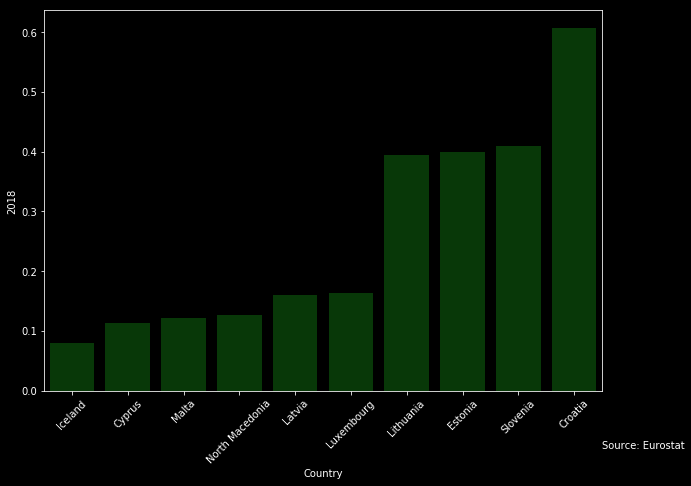

In [640]:
with plt.style.context('dark_background'):

    plt.figure(figsize=(10,7))

    sorted_df = percentages['2018'].sort_values(ascending=True).dropna().head(10)

    sns.barplot(x = sorted_df.index,y=sorted_df,color='green',alpha=0.5)
    plt.xticks(rotation=45)
    plt.xlabel('Country')
    plt.figtext(0.9, 0.01, 'Source: Eurostat', horizontalalignment='left', fontsize=10)
    plt.savefig('bottom_10.png',bbox_inches='tight')
    plt.show()

In [645]:
cagr = ((((employment['2018'] / employment['2015'])) ** (1/(2018-2015))) - 1)*100

In [646]:
cagr = cagr.dropna()

In [647]:
cagr

GEO
Austria             4.807220
Belgium             6.659230
Bulgaria           11.276414
Croatia            10.556084
Cyprus             10.641714
Czechia             5.651478
Denmark             5.121677
Estonia             9.967609
Finland             4.835349
France              3.985944
Germany             3.452485
Greece             16.445457
Hungary             2.762643
Iceland             1.818579
Ireland             5.521805
Italy               4.477412
Latvia             -7.810678
Lithuania          10.359321
Luxembourg          9.139288
Malta              15.313156
Netherlands         4.834771
North Macedonia    -0.819709
Norway              3.303165
Poland              4.700463
Portugal            3.398681
Romania             5.738227
Slovakia            6.257187
Slovenia            5.742904
Spain              13.236306
Sweden              5.572109
Switzerland         2.944219
Turkey              3.332723
United Kingdom      1.890240
dtype: float64

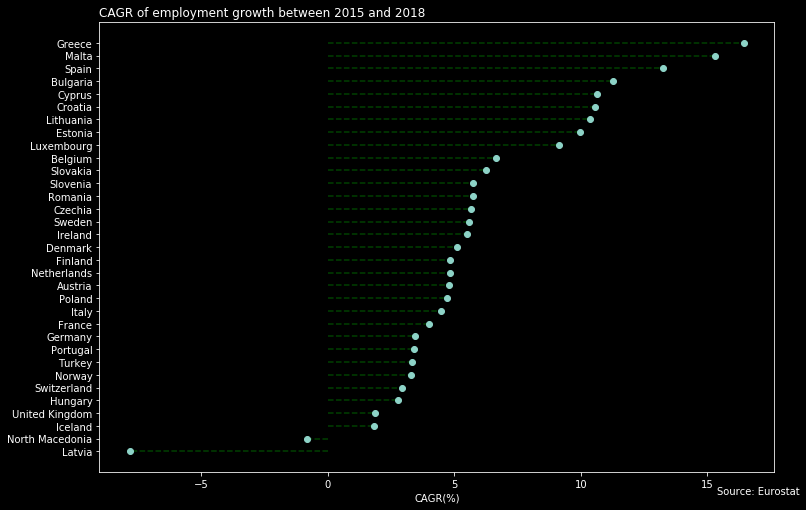

In [648]:
with plt.style.context('dark_background'):

    plt.figure(figsize=(10,7))
    ordered_df = cagr.sort_values(ascending=True)
    my_range=range(1,len(ordered_df.index)+1)
    plt.hlines(y=my_range, xmin=0, xmax=ordered_df, color='green',linestyles='dashed',alpha=0.5)
    plt.plot(ordered_df, my_range, "o", )
    plt.title('CAGR of employment growth between 2015 and 2018', loc='left')
    plt.tight_layout()
    plt.yticks(my_range, ordered_df.index)
    plt.xlabel('CAGR(%)')
    plt.figtext(0.9, 0.01, 'Source: Eurostat', horizontalalignment='left', fontsize=10)
    plt.savefig('2015-2018.png',bbox_inches='tight')
    plt.show()